# Fitting a Hologram

This notebook shows how to load pre-recorded holograms colloidal spheres
into a **Frame** object and analyze them with Lorenz-Mie theory. The analysis 
detects all of the spheres in the field of view and yields values for each
spheres radius, refractive index and three-dimensional location, together with
error estimates for each value.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

# import cupy # Use GPU acceleration
from pylorenzmie.analysis import Frame

## Framework for Lorenz-Mie analysis
First, we instantiate a **Frame** object. By default, **Frame** analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a representation of the instrument that records the images we wish to analyze. In this example, we specify that the instrument is an in-line holographic microscope that illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. We will be analyzing holograms of colloidal spheres dispersed in water. The refractive index of the medium therefore is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations. The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.1)

frame = Frame(**configuration)

Adding autoShape... 


We also will want to report the results of our hologram analysis. Here's a handy helper function:

In [3]:
def report(frame):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(frame.results.x_p, frame.results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(frame.results)

## Read in holographic microscopy data
Next, we load the hologram that we wish to analyze. The Frame() object expects a normalized hologram whose background intensity value is 1. Our example holograms are stored as PNG images with the background value set to 100. We use OpenCV to read them in as single-channel grayscale images, convert them to floating-point arrays and then normalize them.

In [4]:
data = cv2.imread('tutorials/PS_silica.png', 0).astype(float) / 100

## Analyze the normalized hologram with Frame()

          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  376.462720  0.021776  481.917792  0.020837  181.617641  0.114223  0.774945   
1  907.751815  0.038703  484.791667  0.037753  178.939560  0.166569  0.493379   

       da_p       n_p      dn_p  success   npix    redchi  
0  0.001332  1.557105  0.000587     True  10240  2.945759  
1  0.001932  1.425501  0.000769     True  11424  0.895599  


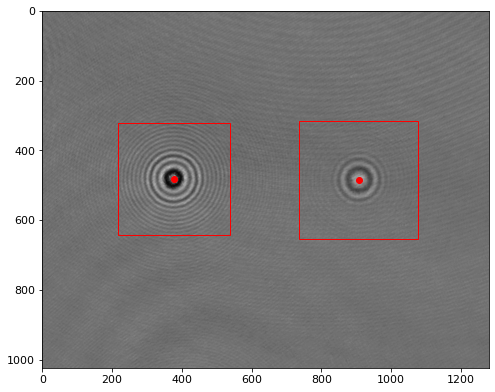

In [5]:
frame.analyze(data)
report(frame)

## Now that it's all set up, run it again

In [6]:
#data = cv2.imread('tutorials/image0010.png', 0).astype(float)
#data /= np.median(data)
#frame.analyze(data)
#report(frame)